# NFT 데이터 분석 

NFT관련 데이터 N개를 이용하여 조금씩 분석하였음.

### 1.NFT 시계열 데이터 분석

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

path = "./data/NFT_Sales.csv"
df = pd.read_csv(path, parse_dates=['Date']).set_index('Date') #시계열로 읽음

#### ※NFT 시계열 데이터*  
출처 : [NFT HistorySales](https://www.kaggle.com/mathurinache/nft-history-sales)  
데이터 범위 : 2017-06-22 ~ 2021-11-12  
*※Columns Explanation※*  
* * *
Sales_USD_cumsum :지금까지 누적 판매 달러  
Number_of_Sales_cumsum : 지금까지 누적 판매된 개수  
Active_Market_Wallets_cumsum :지금까지 거래가 이루어졌던 누적 마켓 지갑 수 (이용자 수라고 보면 됨)  
Primary_Sales_cumsum : 1차 시장 누적 판매 (1차 시장은 창작자와 수집가 사이의 거래)  
Secondary_Sales_cumsum : 2차 시장 누적 판매 (수집가가 다른 유저와 교환하는 거래 ex) opeanSea 거래)   

AverageUSD_cum	 평균 판매 달러  
Sales_USD 판매 가격  
Number_of_Sales 판매 개수  
Active_Market_Wallets	활성화된 마켓 지갑 수  
Primary_Sales : 1차 시장 누적 판매 (창작자와 수집가 사이의 거래)  
* * *

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1606 entries, 2017-06-22 to 2021-11-12
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Sales_USD_cumsum              1606 non-null   float64
 1   Number_of_Sales_cumsum        1606 non-null   int64  
 2   Active_Market_Wallets_cumsum  1598 non-null   float64
 3   Primary_Sales_cumsum          1606 non-null   int64  
 4   Secondary_Sales_cumsum        1605 non-null   float64
 5   AverageUSD_cum                1605 non-null   float64
 6   Sales_USD                     1605 non-null   float64
 7   Number_of_Sales               1605 non-null   float64
 8   Active_Market_Wallets         1597 non-null   float64
 9   Primary_Sales                 1605 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 138.0 KB


#### ※데이터 NaN값 처리  
'Active_Market_Wallets_cumsum' 과 'Active_Market_Wallets'는 mean 그 외는 0으로 처리  
지갑은 계속 유지되기 때문에 mean 값 처리

In [6]:
df.isnull().sum()
df['Active_Market_Wallets_cumsum'] = df['Active_Market_Wallets_cumsum'].fillna(df['Active_Market_Wallets_cumsum'].mean())
df['Active_Market_Wallets'] = df['Active_Market_Wallets'].fillna(df['Active_Market_Wallets'].mean())
df = df.fillna(0)
df.tail()

,Sales_USD_cumsum,Number_of_Sales_cumsum,Active_Market_Wallets_cumsum,Primary_Sales_cumsum,Secondary_Sales_cumsum,AverageUSD_cum,Sales_USD,Number_of_Sales,Active_Market_Wallets,Primary_Sales
Date,,,,,,,,,,
2021-11-08,1.008803e+10,10913146,155847.829161,6541355,14829.0,924.39,7.706698e+07,59264.0,502.875391,44435.0
2021-11-09,1.014001e+10,10964025,155847.829161,6573511,18723.0,924.84,5.197508e+07,50879.0,502.875391,32156.0
2021-11-10,1.019902e+10,11008847,155847.829161,6601205,17128.0,926.44,5.901034e+07,44822.0,502.875391,27694.0
2021-11-11,1.023456e+10,11022782,155847.829161,6609013,6127.0,928.49,3.554317e+07,13935.0,502.875391,7808.0
2021-11-12,1.022836e+10,11020587,155847.829161,6607842,-1024.0,928.11,-6.196720e+06,-2195.0,502.875391,-1171.0


#### ※데이터 추이 시각화 및 분석  
\[1st plot\]NFT 판매량 : 2021년 7월쯤부터 NFT의 판매량이 많아졌다.  
\[2nd plot\]마켓 지갑 활성화(누적) : 천천히 증가하다 마찬가지로 2021년 부터 NFT 시장에 들어오는 사람이 많아졌다.  
\[3rd plot\]판매 가격 : 한 단위당 100 milion USd이다. 한국돈 1200억원인데, 올해(2021년) 9월쯤에 하루 거래량이 4천억을 넘어선 일이 있었다.  
\[4th plot\]평균 판매 가격 : 극초반에 증가했다가 일정 판매가격을 유지하고, 최근들어 거품낀거마냥 폭등한걸 볼 수 있다. 

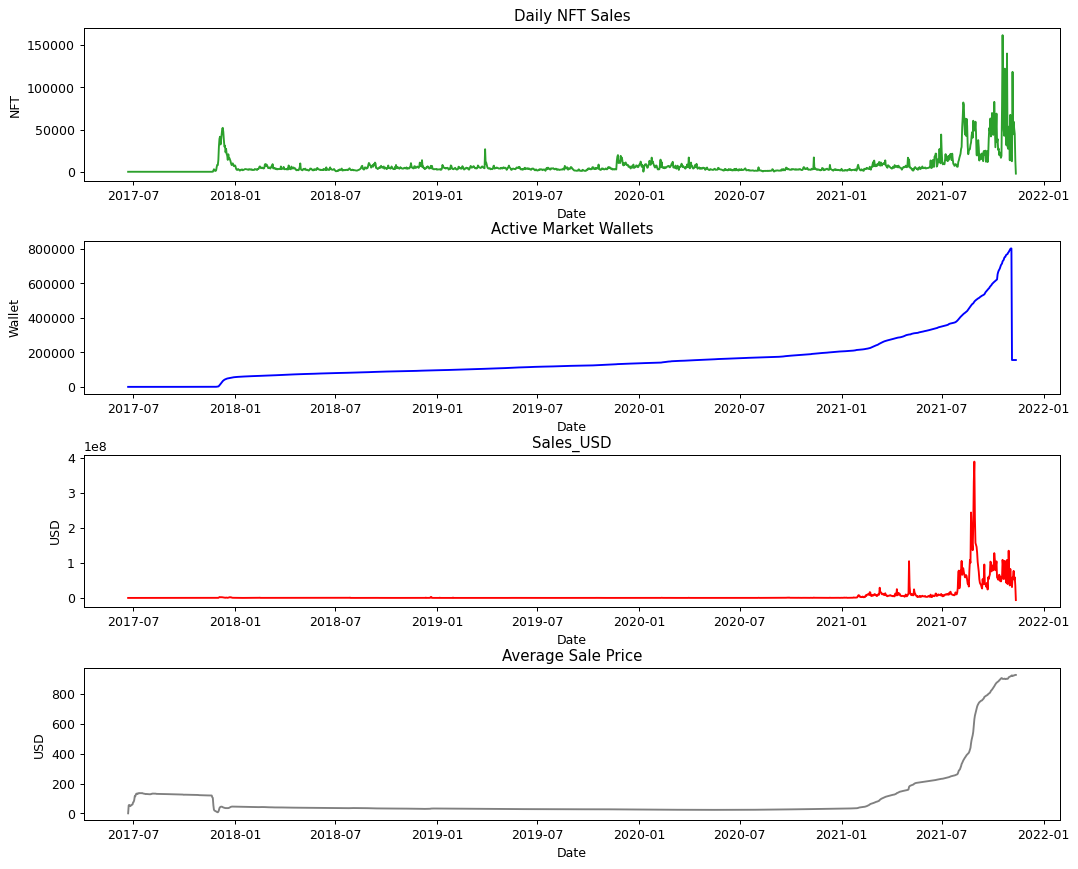

In [7]:
fig, axes = plt.subplots(4, 1, figsize=(14,11), dpi = 90)

plt.subplot(4, 1, 1)
plt.plot(df.index, df.Number_of_Sales, color='tab:green')
plt.gca().set(title='Daily NFT Sales', xlabel='Date', ylabel='NFT')

plt.subplot(4, 1, 2)
plt.plot(df.index, df.Active_Market_Wallets_cumsum, color='blue')
plt.gca().set(title='Active Market Wallets', xlabel='Date', ylabel='Wallet')

plt.subplot(4, 1, 3)
plt.plot(df.index, df.Sales_USD, color='red')
plt.gca().set(title='Sales_USD', xlabel='Date', ylabel='USD')

plt.subplot(4, 1, 4)
plt.plot(df.index, df.AverageUSD_cum, color='grey')
plt.gca().set(title='Average Sale Price', xlabel='Date', ylabel='USD')

plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.4)



#### ※1차 시장과 2차 시장의 Trend와 Seasonality 확인

Primary sales -> transactions between creator and collector  
Secondary sales ->  trading / transactions between collector and community

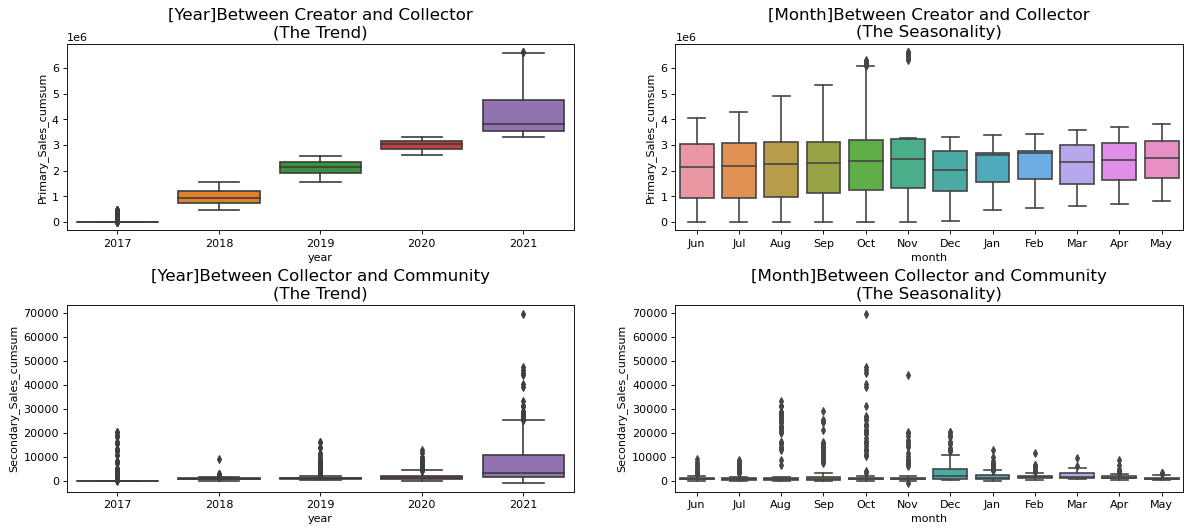

In [8]:
# Prepare data
df['year'] = [d.year for d in df.index]
df['month'] = [d.strftime('%b') for d in df.index]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(2, 2, figsize=(18,7), dpi= 80)
sns.boxplot(x= df['year'], y = df['Primary_Sales_cumsum'], data= df, ax = axes[0,0]) 
sns.boxplot(x= df['month'], y = df['Primary_Sales_cumsum'], data=df, ax = axes[0,1]) 
sns.boxplot(x= df['year'], y = df['Secondary_Sales_cumsum'], data= df, ax = axes[1,0]) 
sns.boxplot(x= df['month'], y = df['Secondary_Sales_cumsum'], data=df, ax = axes[1,1]) 

# Set Title
axes[0,0].set_title('[Year]Between Creator and Collector\n(The Trend)', fontsize=15); 
axes[0,1].set_title('[Month]Between Creator and Collector\n(The Seasonality)', fontsize=15)
axes[1,0].set_title('[Year]Between Collector and Community\n(The Trend)', fontsize=15); 
axes[1,1].set_title('[Month]Between Collector and Community\n(The Seasonality)', fontsize=15)
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.4)
plt.show()

### 2.NFT 컬렉션 분석

지금까지는 시간 데이터를 확인하였다. 실제 거래되는 NFT 컬레션들에 대한 데이터를 분석하기 위해  
데이터 : https://cryptoslam.io/ 사이트의 데이터를 수집한 파일을 이용했다.(11월 25일 기준)  
데이터 출처 : (https://www.kaggle.com/hemil26/nft-eda)  
  
Collections : NFT 컬렉션 이름  
Sales : 총 판매액  
Buyers : 구매자 수  
Txns :  트렌젝션된 횟수(교환 횟수)  
Owners :  컬렉션 소유자들 수  

In [9]:
path = "./data/nft_sales_cryptoslam.csv"
df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Collections  250 non-null    object
 1   Sales        250 non-null    object
 2   Buyers       250 non-null    object
 3   Txns         250 non-null    object
 4   Owners       244 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


#### ※전처리  
Nan값 처리 및 String 타입 int 타입으로 변환

In [10]:
df = df.dropna() # Missing Value 처리 
df.rename(columns = {'Sales':'Sales in USD','Txns':'Transactions'}, inplace = True)
df['Sales in USD'] = df['Sales in USD'].astype(str).str.replace(',', '')
df['Sales in USD'] = pd.to_numeric(df['Sales in USD'].astype(str).str.replace('$', '')) 
df['Buyers'] = pd.to_numeric(df['Buyers'].astype(str).str.replace(',',''))
df['Transactions'] = pd.to_numeric(df['Transactions'].astype(str).str.replace(',',''))
df['Owners'] = pd.to_numeric(df['Owners'].astype(str).str.replace(',',''))
df.tail(5)

,Collections,Sales in USD,Buyers,Transactions,Owners
245,Evolution,2536468,746,4961,2061
246,LegionPunks,2535490,1702,3794,2410
247,BabyApes,2521714,1671,3405,2785
248,Train of the Century,2504080,3139,39460,3160
249,Cyber Pharmacist,2498805,3206,8452,3689


#### ※WCSS를 통해 Clustering 할만한가를 확인  
데이터를 못 나눌 수준은 아님.

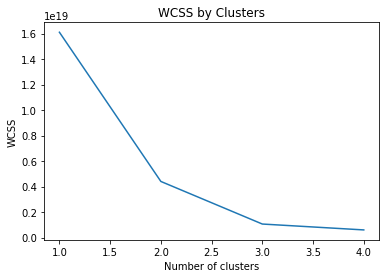

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline


X = df.drop(columns=['Collections'])
# Create 10 models with 1 to 10 clusters
wcss = []
for i in range(1,5):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(X.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1,5), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### ※1,000억원(100million USD)를 기준으로 컬렉션을 나눈 후 분포 시각화
WCSS를 토대로 2분류로 나누고 1000억원 넘는 것들만 다룸

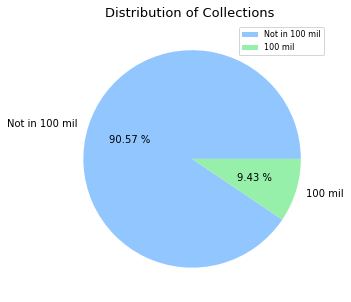

,Collections,Sales in USD,Buyers,Transactions,Owners,100 mil group
0,Axie Infinity,3328148500,1079811,9755511,2656431,Yes
1,CryptoPunks,1664246968,4723,18961,3289,Yes
2,Art Blocks,1075223906,20934,117602,25094,Yes
3,Bored Ape Yacht Club,783882186,8284,22584,5862,Yes
4,NBA Top Shot,781965423,374818,11790699,603928,Yes
5,Mutant Ape Yacht Club,422429206,10350,17343,10254,Yes
6,Loot,264652035,3571,9997,2555,Yes
7,Meebits,237519388,5112,13580,5361,Yes
8,Cool Cats,186937798,7960,23007,5029,Yes
9,CrypToadz,170407439,6277,15005,3525,Yes


In [12]:
df['100 mil group'] = np.where(df['Sales in USD'] > 100000000, 'Yes', 'No') #상위 컬렉션을 분석하기위해 약1000억원, '100milion USD'로 나눔

count = df.groupby(['100 mil group']).count()['Collections']
labels = ["Not in 100 mil","100 mil"]

plt.style.use('seaborn-pastel')
plt.figure(figsize=(5,5))
plt.pie(count,labels=labels,autopct='%.2f %%',textprops={'fontsize': 10})
plt.title("Distribution of Collections ",fontdict={'fontsize': 13})
plt.legend(fontsize=8)
plt.show()

condition = (df['100 mil group'] == 'Yes')
df_mil = df[condition]
df_mil

#### ※데이터 확인 및 이상점에 대한 원인 분석(NFT Owners가 IQR 넘어선 컬렉션을 이상점으로 봄)

Owner_IQR : 24752.25


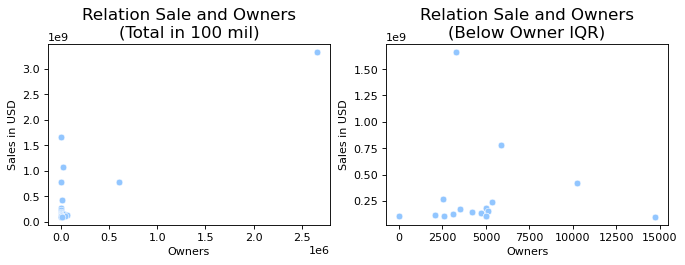

,Collections,Sales in USD,Buyers,Transactions,Owners,100 mil group
0,Axie Infinity,3328148500,1079811,9755511,2656431,Yes
2,Art Blocks,1075223906,20934,117602,25094,Yes
4,NBA Top Shot,781965423,374818,11790699,603928,Yes
13,Farmers World,142416548,19459,456350,28679,Yes
15,Sorare,129615752,42675,713122,60277,Yes
17,Zed Run,120191155,40469,160217,40190,Yes


In [13]:
# 거래액이 1000억 넘는 컬렉션 중 Owners를 중심으로 비교 
fig, axes = plt.subplots(1, 2, figsize=(10,3), dpi= 80)

#sns.set_style('darkgrid')
sns.scatterplot(x='Owners', y='Sales in USD', data=df_mil, ax = axes[0])
axes[0].set_title('Relation Sale and Owners\n(Total in 100 mil)', fontsize=15); 

IQR_owe = 1.5*(df_mil['Owners'].quantile(.75) - df_mil['Owners'].quantile(.25))
print('Owner_IQR : {}'.format(IQR_owe))
condition = (df_mil['Owners'] < IQR_owe)
df_low = df_mil[condition]

#Owners
sns.scatterplot(x='Owners', y='Sales in USD', data=df_low, ax = axes[1])
axes[1].set_title('Relation Sale and Owners\n(Below Owner IQR)', fontsize=15); 

plt.show()
# #Owners와 Sales in USD  # g = sns.pairplot(selectedDataFrame)

df_up = df_mil[(df_mil['Owners'] > IQR_owe)]
df_up.style.set_caption("Owners가 IQR 이상인 데이터")


**이상점 원인 : Creator가 Player인 경우**  
Axie Infinity : NFT 게임(게임 Player들이 전부 Creator)  
Art Blocks	: 일종의 NFT 플랫폼이라고 보면됨(Creator가 한명이 아님)  
NBA Top Shot : 일종의 NFT 플랫폼, NBA농구선수들 관련(Creator 여러명)  
Farmers World : NFT 게임(농사하는 게임)  
Sorare : NFT 게임(Football 관련 게임)  
Zed Run : NFT 게임(말 경주 게임)  
- - - -

#### ※거래량과 거래액 비교 ( 1억만달러 그룹 내에서 )
트랜잭션(거래횟수, 즉 거래량)이 높으면 거래액이 높은지 확인
결과 : Case by Case(케바케)

Most)	이름 : NBA Top Shot	트랜잭션 : 11790699
hsblt)	이름 : CryptoPunks	트랜잭션 : 18961
Least)	이름 : CyberKongz	트랜잭션 : 3962


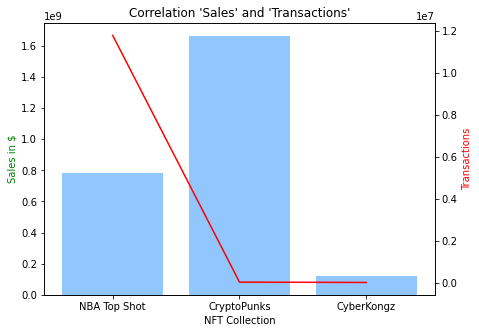

In [14]:
most_trx = df_mil['Transactions'].max()
most_data = df_mil[df_mil['Transactions']== most_trx]
name_of_most = most_data['Collections'].iloc[0] #이름 저장 
sales_of_most = most_data['Sales in USD'].iloc[0]


hsblt_trx = df.iloc[1][3] # higher_Sales_but_lower_trx 줄여서 hsblt ㅋㅋ 
name_of_hsblt = df.iloc[1][0]
sales_of_hsblt = df.iloc[1][1]


least_trx = df_mil['Transactions'].min()
least_data = df_mil[df_mil['Transactions']==least_trx]
name_of_least = least_data['Collections'].iloc[0]
sales_of_least = least_data['Sales in USD'].iloc[0]

print(f'Most)\t이름 : {name_of_most}\t트랜잭션 : {most_trx}')
print(f'hsblt)\t이름 : {name_of_hsblt}\t트랜잭션 : {hsblt_trx}')
print(f'Least)\t이름 : {name_of_least}\t트랜잭션 : {least_trx}')

collections = [name_of_most, name_of_hsblt, name_of_least]
sales = [sales_of_most, sales_of_hsblt, sales_of_least]
transactions = [most_trx, hsblt_trx, least_trx]

fig,ax1 = plt.subplots(figsize=(7,5))
ax2 = ax1.twinx()
ax1.bar(collections, sales)
ax2.plot(collections,transactions,'r-')
plt.title('Correlation \'Sales\' and \'Transactions\'')
ax1.set_xlabel('NFT Collection')
ax1.set_ylabel('Sales in $',color='g')
ax2.set_ylabel('Transactions',color='r')
plt.show()

### 3. NFT에 대한 트위터 반응 데이터

*각 컬럼들에 의미를 확인해보자*  
user_name : 트위터 닉네임  
user_location : 유저 위치  
user_description : 유저 소개  
user_created :  회원가입 날짜  
user_followers : 팔로워 수, 해당 유저가 인플루언서인지 확인하는 중요한 컬럼    
user_friends : 해당 유저가 팔로우한 수  해당 유저가   
user_favourites : 해당 유저가 좋아요한 게시글 수(?)  
user_verified : 해당 유저가 인증된 사람인지 (False일 경우 익명성이 보장된다고 보면 된다.) 
date : 해당 tweet을 작성한 날짜  
text : 해당 tweet의 내용  
hashtgs : 해당 tweet에 사용된 해쉬태그  
source : 작성 방법 (앱을 이용했다던지.. 등)  
is_retweet : 글에 대한 대답인지(retweet인지)    

In [15]:
path = "./data/NFT_tweets.csv"
df_tweets = pd.read_csv(path)
df_tweets = df_tweets.drop(['user_created', 'user_followers', 'hashtags', 'is_retweet'], axis=1)
df_tweets.sample(4)

,user_name,user_location,user_description,user_friends,user_favourites,user_verified,date,text,source
6361,Apshara Naaz,NaN,"Only for Bitcoin, Ethereum Binance, Solana, Al...",466,264,False,2021-11-14 14:08:10+00:00,@playermons Excellent project. Hope it will g...,Twitter for Android
9826,Benny | benny.tez,United States,"Oil painter, abstract artist, non-representati...",1544,4199,False,2021-11-14 13:14:54+00:00,"@CorleoneCorp @objktcom ""Drawing Board"" 1/1\n\...",Twitter for Android
6267,🐶✨𝗛𝗔𝗣𝗣𝗬𝗗𝗢𝗚_𝗗𝗮𝗲ℕ𝔽𝕋 🌈,ประเทศไทย,Hi you can call me Dae (Da) / NFT creator / Th...,1184,3444,False,2021-11-14 14:09:55+00:00,WIP WIP for new drop 🚧 \n;P \n\n#nft #NFTartis...,Twitter for iPad
8152,Thanhtuan8889,NaN,NaN,41,191,False,2021-11-14 13:41:12+00:00,@gem_insider I think @ElemonGame will be a bo...,Twitter Web App


In [16]:
total = df_tweets.count()
tt = pd.DataFrame(total)
tt.columns = ['Total']
uniques = []
for col in df_tweets.columns:
    unique = df_tweets[col].nunique()
    uniques.append(unique)
tt['Uniques'] = uniques
np.transpose(tt)

,user_name,user_location,user_description,user_friends,user_favourites,user_verified,date,text,source
Total,12451,6007,10832,12452,12452,12452,12452,12452,12452
Uniques,6530,1807,5450,2148,3150,2,7644,11768,172


#### ※유저들의 Location 

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


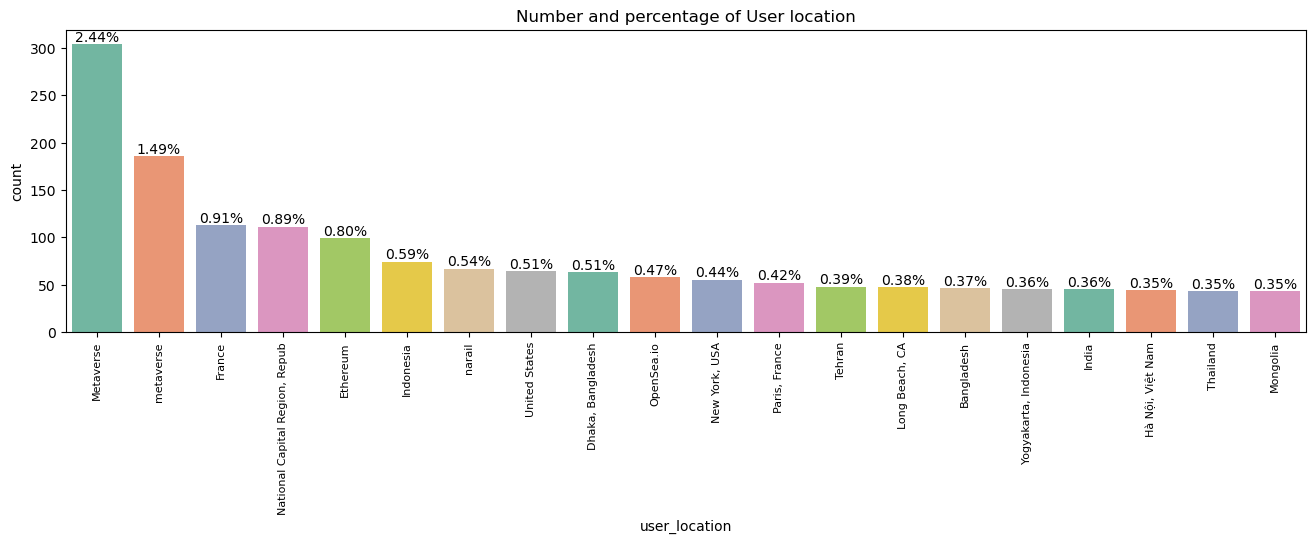

In [17]:
def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4), dpi=100)
    total = float(len(df))
    if ordered:
        g = sns.countplot(df_tweets[feature], order = df_tweets[feature].value_counts().index[:20], palette='Set2')
    else:
        g = sns.countplot(df_tweets[feature], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()   
    
# plot_count("user_name", "User name", df_tweets,4)
plot_count("user_location", "User location", df_tweets,4)

#### ※트윗데이터 워드 클라우드로 시각화

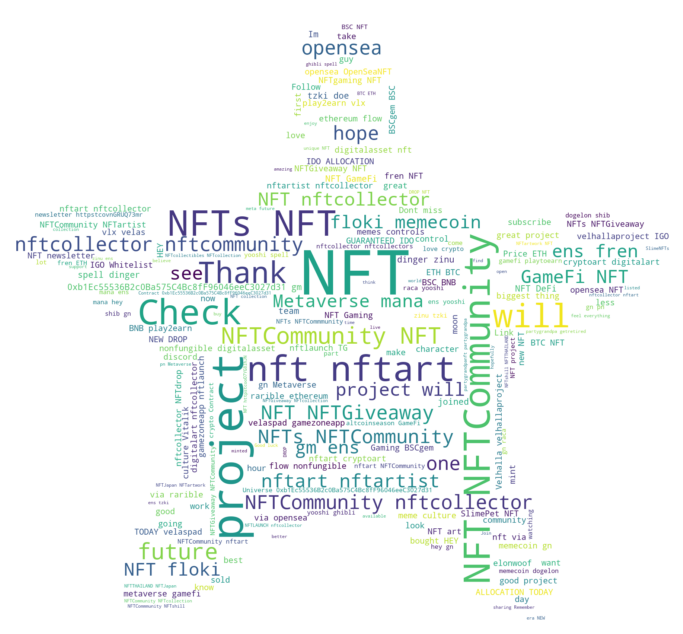

In [417]:
import re
from collections import Counter
df1 = df_tweets['text'][0:12452]
df1 = df1.tolist()
listA = []
b = ""
for i in df1:
    a = re.sub(r"[^a-zA-Z0-9\s]","", i)
    b = b + ' ' + a

from wordcloud import WordCloud
from PIL import Image
from wordcloud import STOPWORDS
mask = np.array(Image.open('./asd.png'))
stopwords = set(STOPWORDS)
stopwords.add('said')

wc = WordCloud(background_color='white',
              max_words=200,
              mask=mask,
              stopwords=stopwords)
wc = wc.generate(b)

plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

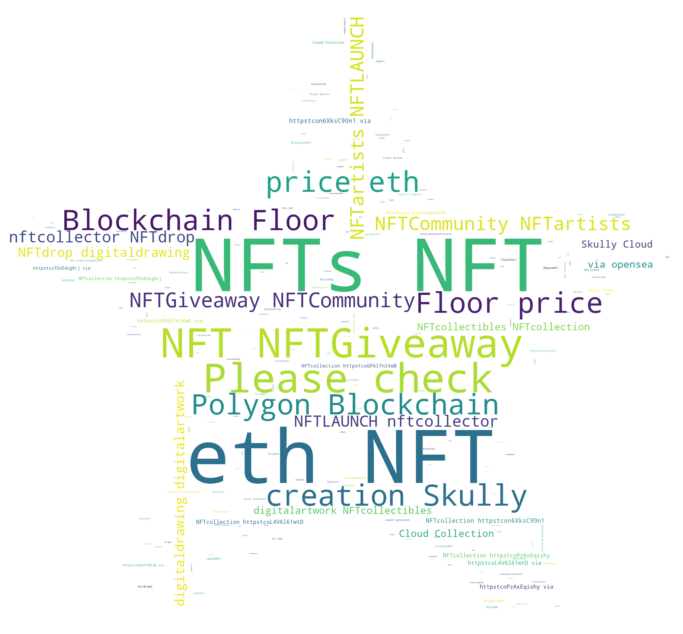

In [425]:
france = df_tweets.loc[df_tweets.user_location=="France"]

df1 = france['text'][0:12452]
df1 = df1.tolist()
listA = []
b = ""
for i in df1:
    a = re.sub(r"[^a-zA-Z0-9\s]","", i)
    b = b + ' ' + a


    
mask = np.array(Image.open('./asd.png'))
stopwords = set(STOPWORDS)
stopwords.add('said')

wc = WordCloud(background_color='white',
              max_words=200,
              mask=mask,
              stopwords=stopwords)
wc = wc.generate(b)

plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

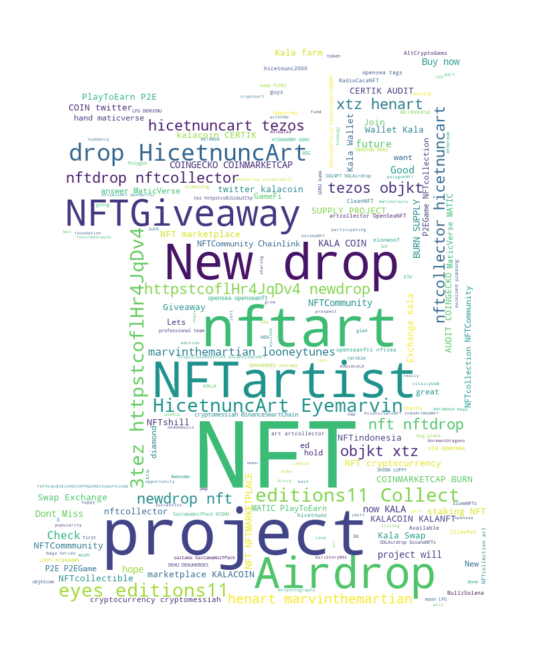

In [423]:
indonesia = df_tweets.loc[df_tweets.user_location=="Indonesia"]

df1 = indonesia['text'][0:12452]
df1 = df1.tolist()
listA = []
b = ""
for i in df1:
    a = re.sub(r"[^a-zA-Z0-9\s]","", i)
    b = b + ' ' + a


    
mask = np.array(Image.open('./indonesia.png'))
stopwords = set(STOPWORDS)
stopwords.add('said')

wc = WordCloud(background_color='white',
              max_words=200,
              mask=mask,
              stopwords=stopwords)
wc = wc.generate(b)

plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()